In [1]:

import pandas as pd

In [2]:
import pyspark
import random
import findspark

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("student.csv")
df.head()

,id,name,class,mark,gender
0,1,John Deo,Four,75,female
1,2,Max Ruin,Three,85,male
2,3,Arnold,Three,55,male
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female


In [9]:
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      35 non-null     int64 
 1   name    35 non-null     object
 2   class   35 non-null     object
 3   mark    35 non-null     int64 
 4   gender  35 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [4]:
df['gender'].replace(['female', 'male'], [1,0], inplace=True)
df.head(5)

,id,name,class,mark,gender
0,1,John Deo,Four,75,1
1,2,Max Ruin,Three,85,0
2,3,Arnold,Three,55,0
3,4,Krish Star,Four,60,1
4,5,John Mike,Four,60,1


In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [20]:
df.drop(['name', 'class'], axis=1)

,id,mark,gender
0,1,75,1
1,2,85,0
2,3,55,0
3,4,60,1
4,5,60,1
5,6,55,0
6,7,78,0
7,8,85,0
8,9,78,0
9,10,55,1


In [31]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [32]:
best_features= SelectKBest(score_func=chi2, k='all')
fit= best_features.fit(X,Y)

ValueError: Found input variables with inconsistent numbers of samples: [150, 35]

In [24]:
df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(X.columns)

In [25]:
features_scores= pd.concat([df_columns, df_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score')

,Features,Score
0,id,0.915033


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)


In [37]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [38]:
print(lr_train_mse)

0.04909338369821791


In [39]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=42)

In [40]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [43]:
rf_results = pd.DataFrame(['Random forest',rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

In [44]:
print(rf_results)

          Method Training MSE Training R2 Test MSE   Test R2
0  Random forest     0.028979    0.955977  0.00709  0.989855


Text(0.5, 0, 'Experimental LogS')

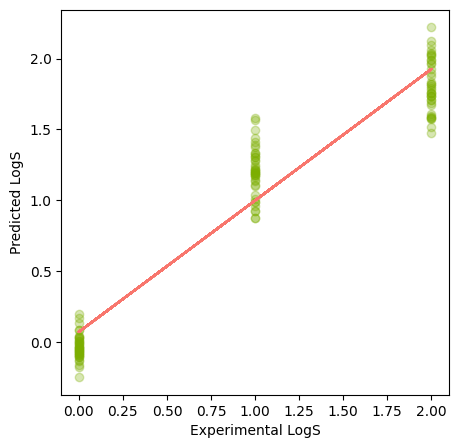

In [45]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00", alpha=0.3)
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train,p(y_train),"#F8766D")
plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')